# Correlation is NOT causation

Correlation tests check if two samples are related

### Spearman's Correlation Coefficient
- monotonic function (always in same direction)
- non-linear
- unitless metric (-1 to 1 value ONLY)

### Pearson's Correlation Coefficient
- **Goal**: answer if two samples have LINEAR relationship
- Linear:
    - r of 0.004 = random dots
    - r of 0.978 = dots left to right (diagnol)- pure positive correlation ( / )
    - r of -0.978 = dots right to left (diagnol)- pure negative correlation ( \ )

#### How do we complete this goal?
1. Calculate the Pearson correlation coefficient, $r_{xy}$
2. Calculate the corresponding t-values
3. Test whether the t-values are signifcant or not

_____________________________________________________________

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt

from scipy import stats
from pydataset import data

In [4]:
df = pd.read_csv('exam_scores.csv')
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


In [6]:
df.info()
#get data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   exam_score       40 non-null     float64
 1   hours_studied    40 non-null     float64
 2   study_strategy   20 non-null     object 
 3   handedness       40 non-null     object 
 4   coffee_consumed  40 non-null     int64  
 5   hours_slept      40 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ KB


## Pre-Set Values
Before we perform the test, we will choose some values for our confidence interval and, based on that value, our alpha.

In [13]:
#number of rows
n = df.shape[0] 

#degrees of freedom- how much the data can vary
deg_f = n-2 

#confidence interval (!)
conf_in = 0.95

alpha = 1- conf_in

When performing a correlation test, our null hypothesis is that there is no linear correlation between the two variables.


$H_0$: There is no linear correlation between the number of hours studied and the score on the exam.

## Calculate Pearson Correlation Coefficient

The correlation coefficient, $r_{xy}$ is a unitless continuous numerical measure between -1 and 1, where 1 = perfect correlation and -1 = perfect negative correlation.

In [14]:
#trying to show corrleation between hours studied and exam score

x = df.hours_studied
y= df.exam_score

def stdev(x):
    '''
    returns the flaot value of standard deviatio of input x, 
    an argument representing a pandas Series or 1-D numy array
    '''
    variance = ((x- x.mean()) ** 2).sum()/n
    return variance ** 0.5

In [15]:
stdev(y)

28.687692543959553

In [17]:
#calculation for pearson's correlation
r_xy = ((1/n) * (((x-x.mean()) * (y-y.mean())).sum()))/ (stdev(x) * stdev(y))

In [18]:
r_xy

0.8351498542755269

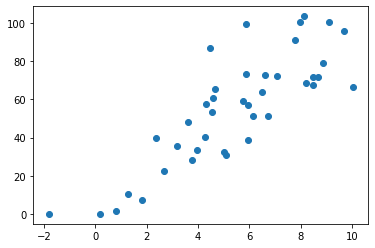

In [19]:
plt.scatter(x,y)

In [20]:
# ^-- this shows positive correlation

### Calculate the corresponding p-value

#### first, calculate t-stat

In [23]:
#calculation for t-statistic:
t= (r_xy * sqrt(deg_f))/ sqrt(1-r_xy **2)
t

9.35999837853023

#### next, calculate our p-value:

In [25]:
# calculation for p-value
p = stats.t.sf(t, df = deg_f) * 2
p

2.076295324018843e-11

In [26]:
p <alpha

True

In [ ]:
# because p < alpha, we can reject our null hypothesis

_____________________________________________________

## Now, the EASY way

In [28]:
corr, p = stats.pearsonr(x,y)

In [29]:
corr

0.835149854275527

In [30]:
p

2.07629532401882e-11

_____

# Mini Exercise
1. Load up the Swiss dataset from pydataset.
2. Examine the proportion of Catholic individuals to Fertility.
3.
   -  a. What do your r and p statistics indicate? 
   -  b. What do they tell you? 
   -  c. What is your null hypothesis?

#### #1 Load up the Swiss dataset from pydataset.

In [32]:
swiss = data('swiss')

In [33]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [34]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


#### #2 Examine the proportion of Catholic individuals to Fertility.

In [44]:
x = swiss.Catholic
y = swiss.Fertility

In [45]:
#number of rows
n = df.shape[0] 

#degrees of freedom- how much the data can vary
deg_f = n-2 

#confidence interval (!)
conf_in = 0.95

alpha = 1- conf_in

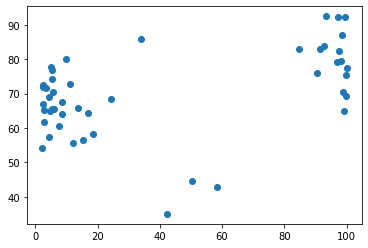

In [46]:
plt.scatter(x,y)

#### #3a. What do your r and p statistics indicate?

In [49]:
r, p = stats.pearsonr(x,y)
print(f'We calcaulate a pearson r of {r:3f} and a statistical certainty p of {p:4f}')

We calcaulate a pearson r of 0.463685 and a statistical certainty p of 0.001029


In [41]:
corr
#close to 0.5 cut off- so, there is some positive correlation

0.463684700651794

In [42]:
p

0.0010285231901181408

#### #3b. What do they tell you?

In [43]:
p <alpha

True

#### #3c. What is your null hypothesis?
$H_0$: There is no linear correlation between the Catholicism and Fertility

__________

## EXTRA NOTES:

#### Correlation:
- **Correlation of 0** = no positive correlation
- **Correlation of 0.5** = somewhat positive correlation
- **Correlation of 1.0** = positive correlation
- **Correlation of -0.5** = somewhat negatice correlation
- **Correlation of -1.0** = negative correlation

#### Pearsons is ONLY for linear correlation

#### Correlation is Not Causation:
- Correlation means that two variables are associated, but doesn't tell us whether one causes the other or not.

________________

## Non-Linear Relationship

In [51]:
#this example shows a correlation that is NOT linear
x= np.linspace(-3,3)
y= x**2

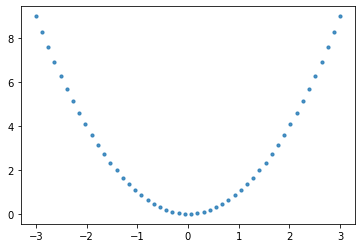

In [53]:
plt.scatter(x,y, s=10, alpha= 0.8)
plt.show()
#this shows a strong parabolic relationship

In [56]:
r, p = stats.pearsonr(x,y)
r,p
#shown above

(-1.3183898417423734e-16, 0.999999999999995)

In [58]:
#second example IS linear
x= np.linspace(0,3)
y= x**2

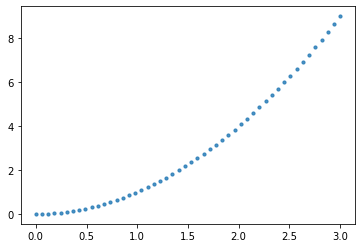

In [59]:
plt.scatter(x,y, s=10, alpha= 0.8)
plt.show()
#this shows a linear relationship

In [60]:
r, p = stats.pearsonr(x,y)
r,p
#shown above

(0.9670508513356972, 3.571438638597879e-30)

In [61]:
### pearson's R does only show linear relationships

______________

### Confounding Variables

We must be careful because correlation doesn't tell the whole story of a dataset. That is, correlation just looks at two variables in isolation, and doesn't account for any others. For example, a certain subgroup could have a strong correlation while another does not, or a third variable could be influencing both of the variables.


In [62]:
df = pd.read_csv('exam_scores.csv')

In [63]:
df.columns
#this shows the name of each column

Index(['exam_score', 'hours_studied', 'study_strategy', 'handedness',
       'coffee_consumed', 'hours_slept'],
      dtype='object')

In [79]:
x= df.coffee_consumed
y= df.exam_score

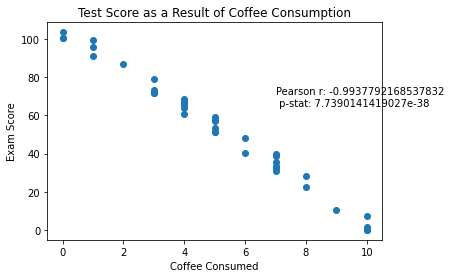

In [80]:
plt.scatter(x,y)
plt.xlabel('Coffee Consumed')
plt.ylabel('Exam Score')
plt.title('Test Score as a Result of Coffee Consumption')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]}\n p-stat: {stats.pearsonr(x,y)[1]}', xy=(7,65))
plt.show()

#### ^This shows negative correlation between coffee consumed and exam score

In [81]:
r, p = stats.pearsonr(x,y)
r, p

(-0.9937792168537832, 7.7390141419027e-38)

In [ ]:
# pearson r = -0.99 --> this shows a strong negative correlation

__________

In [76]:
# Second example with same dataframe
# show correlation between hours slept and exam score
x= df.hours_slept
y= df.exam_score

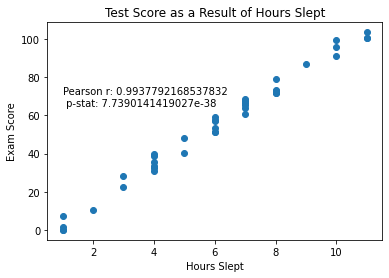

In [77]:
plt.scatter(x,y)
plt.xlabel('Hours Slept')
plt.ylabel('Exam Score')
plt.title('Test Score as a Result of Hours Slept')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]}\n p-stat: {stats.pearsonr(x,y)[1]}', xy=(1,65))
plt.show()

#### ^ this shows a POSITIVE correlation between hours slept and exam score

In [78]:
r, p = stats.pearsonr(x,y)
r, p

(0.9937792168537832, 7.7390141419027e-38)

In [82]:
# pearson r = .99 --> this shows a strong postive correlation

__________

## Scale of relationship

In [85]:
coffee_consumed_rework = [0,1,2,3,4]
exam_score_rework = [80, 80.1, 80.2, 80.3, 80.4]

In [86]:
x= coffee_consumed_rework
y= exam_score_rework

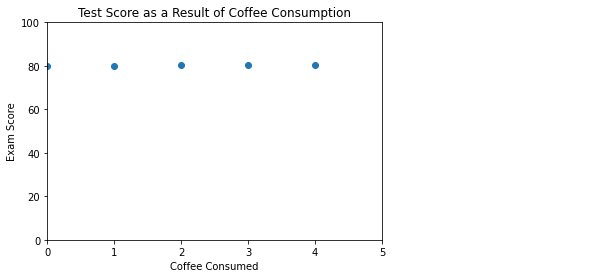

In [89]:
plt.scatter(x,y)
plt.xlabel('Coffee Consumed')
plt.ylabel('Exam Score')
plt.ylim(0,100)
plt.xlim(0,5)
plt.title('Test Score as a Result of Coffee Consumption')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]}\n p-stat: {stats.pearsonr(x,y)[1]}', xy=(7,65))
plt.show()

In [88]:
r, p = stats.pearsonr(x,y)
r, p

(1.0, 0.0)

#### ^this still shows a perfect linear relationship

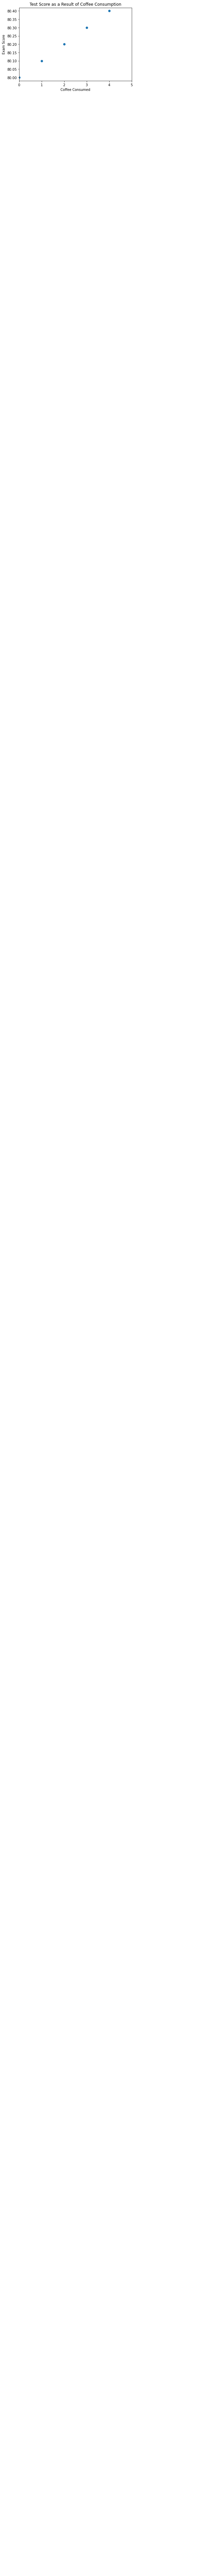

In [91]:
#if you manipulate the graph - take out y limit
plt.scatter(x,y)
plt.xlabel('Coffee Consumed')
plt.ylabel('Exam Score')
#plt.ylim(0,100)
plt.xlim(0,5)
plt.title('Test Score as a Result of Coffee Consumption')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]}\n p-stat: {stats.pearsonr(x,y)[1]}', xy=(7,65))
plt.show()